In [1]:
num_neurons = 3

neuron_spiked = [0]*num_neurons

neuron_values = [0]*num_neuron

In [4]:
connections = [
    [0, 1, 1],
    [1, 0, 0],
    [0, 1, 0]
]

In [5]:
for i in range(num_neurons):
    if neuron_spiked[i]:   

[0, 1, 0]

In [ ]:
def Is(spikes,prev_Is):
    new_Is=prev_Is*decay_constant # for example decay_constant = 0.99
    if spikes>0:
        new_Is=new_Is+spikes*jump_constant # for example jump_constant = 0.1
    return new_Is

### Global Computation Using TF Sparse Multiplication

### https://www.tensorflow.org/api_docs/python/tf/sparse_tensor_dense_matmul

In [10]:
import tensorflow as tf
import numpy as np
import numpy.polynomial.polynomial as poly

from random import randint

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
tf.reset_default_graph()
num_neurons = 50000

In [ ]:
indices = []
values = []
for i in range(num_neurons):
    for j in range(num_neurons):
        if i != j:
            number = randint(0, 99)
            if number < 5:
                indices.append([i, j])
                values.append(1.0/5)
                
connections = tf.SparseTensor(indices=indices, values=values, dense_shape=[num_neurons, num_neurons])

In [ ]:
neuron_values = tf.Variable(np.ones(num_neurons), dtype=tf.float32)

In [ ]:
mul_product = tf.sparse_tensor_dense_matmul(connections, tf.reshape(neuron_values, shape=(num_neurons, 1)))

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
%%time
output = sess.run(mul_product)

In [8]:
x_sparse_matmul = [10, 100, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000]
y_sparse_matmul = [1.02, 1.14, 3.35, 9.34, 18.6, 35.8, 52.9, 258, 1720, 4930]

In [9]:
x_local_mul = [10, 100, 1000, 2000, 3000, 5000, 10000, 20000]
y_local_mul = [2.6, 24.9, 215, 466, 693, 1270, 5240, 12700]

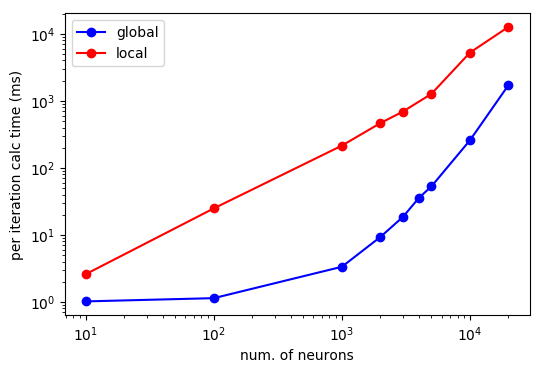

In [10]:
fig = plt.figure()

plt.xscale('log')
plt.yscale('log')

ax1 = fig.add_subplot(111)
ax1.plot(x_sparse_matmul, y_sparse_matmul, 'bo-', label='global')

ax1.plot(x_local_mul, y_local_mul, 'ro-', label='local')

ax1.set_xlabel('num. of neurons')
ax1.set_ylabel('per iteration calc time (ms)')

# coefs = poly.polyfit(x_sparse_matmul, y_sparse_matmul, 3)
# x_new = [10, 100, 1000, 10000, 100000, 1000000]
# ffit = poly.polyval(x_new, coefs)
# plt.plot(x_new, ffit, 'r--')

plt.legend()
plt.draw()